## London Housing - Tree Analysis

Experimenting with using decision trees to evaluate London House price data.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print(np.NaN)

nan


In [2]:
data_path = '../data/10m_london_houses_.csv'
housing_df = pd.read_csv(data_path)

housing_df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [8]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, mean_squared_error

## 1. Data Preprocessing

### 1.1 Encoding

In [9]:
# Check how many unique values are in the addresses column
print(f'Unique addresses: {housing_df["Address"].nunique()}')

# Drop the Address column, apply get_dummies to the remaining columns
housing_df_encoded = pd.get_dummies(housing_df.drop(columns=['Address']),
                                       drop_first=True).astype(np.float32)

cols_encoded = housing_df_encoded.columns
print(f'Columns after encoding ({len(cols_encoded)}):\n{cols_encoded}')
print(f'Data shape: {housing_df_encoded.shape}')

Unique addresses: 770
Columns after encoding (36):
Index(['Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Floors',
       'Price (£)', 'Neighborhood_Chelsea', 'Neighborhood_Greenwich',
       'Neighborhood_Islington', 'Neighborhood_Kensington',
       'Neighborhood_Marylebone', 'Neighborhood_Notting Hill',
       'Neighborhood_Shoreditch', 'Neighborhood_Soho',
       'Neighborhood_Westminster', 'Garden_Yes', 'Garage_Yes',
       'Property Type_Detached House', 'Property Type_Semi-Detached',
       'Heating Type_Electric Heating', 'Heating Type_Gas Heating',
       'Heating Type_Underfloor Heating', 'Balcony_Low-level Balcony',
       'Balcony_No Balcony', 'Interior Style_Industrial',
       'Interior Style_Minimalist', 'Interior Style_Modern', 'View_Garden',
       'View_Park', 'View_Sea', 'View_Street', 'Materials_Laminate Flooring',
       'Materials_Marble', 'Materials_Wood', 'Building Status_Old',
       'Building Status_Renovated'],
      dtype='object')
Data shape: (10

### 1.2 Test train split

In [16]:
# Separate housing_df into features and target variable
X = housing_df_encoded.drop(columns=['Price (£)']).values
y = housing_df_encoded['Price (£)'].values

# Perform train-test split on X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

print('Training data shape: ', X_train.shape, y_train.shape)
print('Test data shape: ', X_test.shape, y_test.shape)

Training data shape:  (700, 35) (700,)
Test data shape:  (300, 35) (300,)


### 1.3 Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2 Modelling

In [20]:
dt = DecisionTreeRegressor(max_depth=5, random_state=23)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'RMSE: {mse ** 0.5}')

RMSE: 388494.43715641124


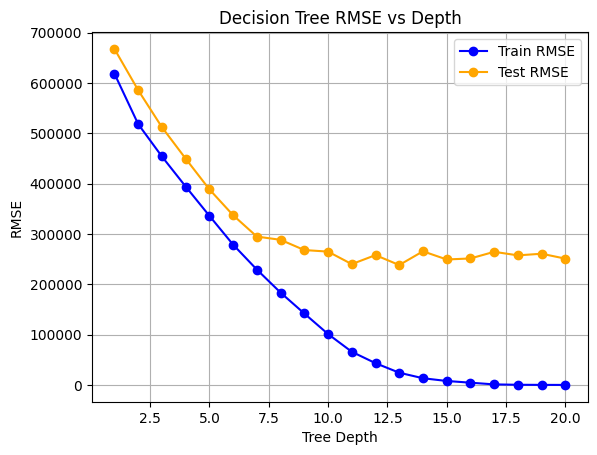

In [24]:
# Loop from 1-10 and record test and training RMSEs, then plot them
train_rmse = []
test_rmse = []
depths = range(1, 21)
for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=23)
    dt.fit(X_train_scaled, y_train)
    y_train_pred = dt.predict(X_train_scaled)
    y_test_pred = dt.predict(X_test_scaled)
    train_rmse.append(mean_squared_error(y_train, y_train_pred) ** 0.5)
    test_rmse.append(mean_squared_error(y_test, y_test_pred) ** 0.5)

plt.plot(depths, train_rmse, 'o-' , color='blue', label='Train RMSE')
plt.plot(depths, test_rmse, 'o-' , color='orange', label='Test RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.title('Decision Tree RMSE vs Depth')
plt.legend()
plt.grid()
plt.show()